We track the flame by defining the 'front' as the highest value of nuclear energy generation 
(H_nuc). (Schwab et. at al 2020 (arXiv:2001.0773) https://arxiv.org/abs/2001.07733 )

In [10]:
import yt
from yt.funcs import mylog
mylog.setLevel(40) # Gets rid of all of the yt info text, only errors.
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import os
from IPython.display import Video

In [11]:
def make_movie(file_list, save_dir='tmp/', var='rho', movie_name="movie.mp4"):
    i = 1
    for file in file_list:
        ds = yt.load(file)
        sl = yt.SlicePlot(ds,2,var)
        sl.save("movie_imag{}.png".format(str(i).zfill(4)))
        i+=1
    os.system("ffmpeg -r 60 -pattern_type glob -i 'movie_imag*.png' -vcodec mpeg4 -y {}".format(movie_name))
    os.system("rm movie_imag*")
    Video("movie.mp4")
    
def flame_speed(file_list):
    Hnucs = []
    xs = []
    ys = []
    zs = []
    ts = []
    for file in file_list:
        ds = yt.load(file)
        ad = ds.all_data()
        #sl = yt.SlicePlot(ds,2,'Hnuc')
        #profile_2d = yt.create_profile(ad, ['x', 'y'], 'Hnuc', weight_field=None)
        #Save Data:
        x,y,z = ad.argmax("Hnuc")
        Hnucs.append(ad.quantities.extrema("Hnuc"))
        xs.append(x)
        ys.append(y)
        zs.append(z)
        ts.append(ds.current_time)
        
    #The below "r" where we track Hnuc, can look very bumpy, because Hnuc, could be 
    #in the same y location (~ distance traveled in a long skinny domain), but could
    #be moving around in the x direction. So - Lets just take the y component. Z should
    #always be zero in 2D anyways. 
    #r = [np.sqrt(xs[i]**2 + ys[i]**2 + zs[i]**2) for i in range(len(xs))]
    r = ys
    v = np.diff(r)/(ts[1]-ts[0])
    return ts, r, v
    
    
def flame_plot(ts,r,v):    
    plt.plot(ts,r)
    plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
    plt.xlabel("Time [Seconds]")
    plt.ylabel("Distance Traveled by Flame [cm]")
    plt.show()
    
    plt.plot(ts[1:],v)
    plt.xlabel("Time [Seconds]")
    plt.ylabel("Velocity [cm/sec]")
    plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(-1,1))

def compare_flame_speed(file_list1, file_list2):
    '''for comparing two file_list's flamespeeds'''
    

In [12]:
'''
flames = np.sort(glob.glob("A path *"))
make_movie(flames, movie_name='strang.mp4', var="Hnuc" )
Video("strang.mp4")
'''

'\nflames = np.sort(glob.glob("A path *"))\nmake_movie(flames, movie_name=\'strang.mp4\', var="Hnuc" )\nVideo("strang.mp4")\n'

In [13]:
#Strang:
lvl0_strang = np.sort(glob.glob("data/flame_convergence/lvl0_flame*"))[:-3] #cut off the three initial plots
lvl1_strang = np.sort(glob.glob("data/flame_convergence/lvl1_flame*"))[:-3]
lvl2_strang = np.sort(glob.glob("data/flame_convergence/lvl2_flame*"))[:-3]
lvl3_strang = np.sort(glob.glob("data/flame_convergence/lvl3_flame*"))[:-4] #for some reason the last plot file has trouble

#SDC 
lvl0_sdc = np.sort(glob.glob("data/flame_convergence_sdc/lvl0_sdc_flame_*"))[:-3]

# Convergence -  Strang integration


1 AMR Level, speed =  95793.24367283349 cm/s
2 AMR Levels, speed =  95776.11510202265 cm/s
3 AMR Levels, speed =  95832.56655976942 cm/s
4 AMR Levels, speed =  91902.93304829033 cm/s


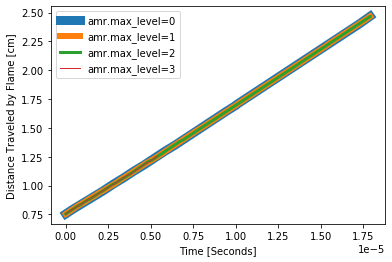

In [21]:
t, r, v = flame_speed(lvl0_strang)
plt.plot(t,r, label='amr.max_level=0', linewidth=9.0)
a, b = np.polyfit(t,r,1)
print("1 AMR Level,  speed = ", a, "cm/s")

t, r, v = flame_speed(lvl1_strang)
plt.plot(t,r, label='amr.max_level=1', linewidth=6.0)
a, b = np.polyfit(t,r,1)
print("2 AMR Levels, speed = ", a, "cm/s")

t, r, v = flame_speed(lvl2_strang)
plt.plot(t,r, label='amr.max_level=2', linewidth=3.0)
a, b = np.polyfit(t,r,1)
print("3 AMR Levels, speed = ", a, "cm/s")

t, r, v = flame_speed(lvl3_strang)
plt.plot(t,r, label='amr.max_level=3', linewidth=1.0)
a, b = np.polyfit(t,r,1)
print("4 AMR Levels, speed = ", a, "cm/s")

plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
plt.xlabel("Time [Seconds]")
plt.ylabel("Distance Traveled by Flame [cm]")
plt.legend()
plt.show()

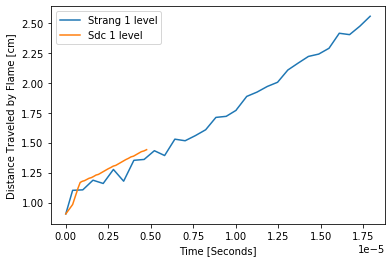

In [34]:
t, r, v = flame_speed(lvl0_strang)
plt.plot(t,r, label='Strang 1 level')
t, r, v = flame_speed(lvl0_sdc)
plt.plot(t,r, label='Sdc 1 level')
plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
plt.xlabel("Time [Seconds]")
plt.ylabel("Distance Traveled by Flame [cm]")
plt.legend()
plt.show()

In [36]:
yt.load(lvl0_strang[-1]).current_time

1.7903741049827826e-05 code_time

In [18]:
x = [1,2,3,4]
y = [1,2,3,4]
a, b = np.polyfit(x,y,1)

In [19]:
a

1.0000000000000002

In [20]:
b

-1.066817165546361e-15